In [20]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras import layers # type: ignore
from tensorflow.keras.models import Sequential # type: ignore
from tensorflow.keras.optimizers import RMSprop # type: ignore
from tensorflow.keras.regularizers import l2 # type: ignore
from tensorflow.keras.layers import Dropout # type: ignore
from tensorflow.keras.callbacks import EarlyStopping # type: ignore
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from tensorflow.keras.utils import to_categorical # type: ignore
from sklearn.impute import SimpleImputer

In [21]:
df = pd.read_csv('../data/Student_performance_data _.csv')
df.head()

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,1001,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2.0
1,1002,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1.0
2,1003,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4.0
3,1004,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3.0
4,1005,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4.0


In [22]:
df.describe()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2392 entries, 0 to 2391
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   StudentID          2392 non-null   int64  
 1   Age                2392 non-null   int64  
 2   Gender             2392 non-null   int64  
 3   Ethnicity          2392 non-null   int64  
 4   ParentalEducation  2392 non-null   int64  
 5   StudyTimeWeekly    2392 non-null   float64
 6   Absences           2392 non-null   int64  
 7   Tutoring           2392 non-null   int64  
 8   ParentalSupport    2392 non-null   int64  
 9   Extracurricular    2392 non-null   int64  
 10  Sports             2392 non-null   int64  
 11  Music              2392 non-null   int64  
 12  Volunteering       2392 non-null   int64  
 13  GPA                2392 non-null   float64
 14  GradeClass         2392 non-null   float64
dtypes: float64(3), int64(12)
memory usage: 280.4 KB


In [23]:
df = df.drop(columns=['StudentID','GradeClass'])
df.head()


,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA
0,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196
1,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915
2,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602
3,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218
4,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061


In [24]:
X = df.drop(columns=['GPA'])
y = df['GPA']

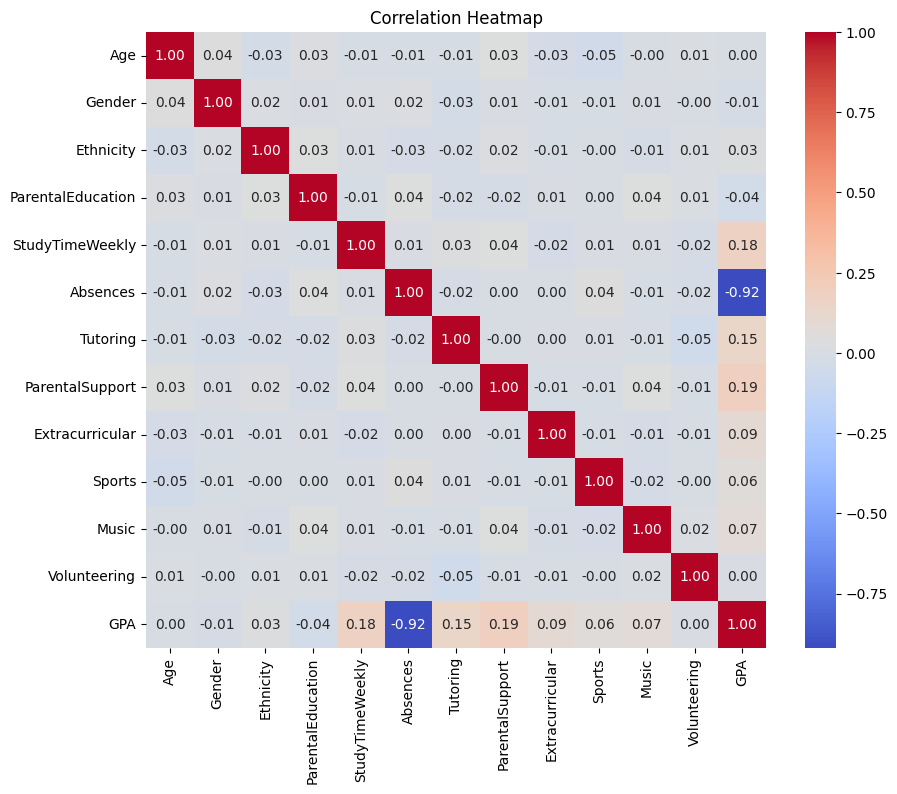

GPA                  1.000000
ParentalSupport      0.190774
StudyTimeWeekly      0.179275
Tutoring             0.145119
Extracurricular      0.094078
Music                0.073318
Sports               0.057859
Ethnicity            0.027760
Volunteering         0.003258
Age                  0.000275
Gender              -0.013360
ParentalEducation   -0.035854
Absences            -0.919314
Name: GPA, dtype: float64


In [25]:
corr = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()
print(corr['GPA'].sort_values(ascending=False))

In [26]:
# # check if it is a linear regression problem

# for column in X.columns:
#     plt.scatter(X[column], y)
#     plt.xlabel(column)
#     plt.ylabel('GPA')
#     plt.show()
    
# for column in X.columns:
#     sns.pairplot(df, x_vars=column, y_vars='GPA', height=5, aspect=0.7, kind='reg')



In [27]:
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

In [28]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X_imputed)

In [29]:
X_temp, X_test, y_temp, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.2, random_state=42)

In [30]:
model = Sequential()
input_layer = X_train.shape[1]

# Refined architecture
model.add(layers.Dense(64, activation='relu', input_shape=[input_layer]))
model.add(Dropout(0.2))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(1, activation='linear'))  # Linear activation for continuous output

# Early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)

# Compile model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Train model
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_val, y_val), callbacks=[early_stopping])


c:\Users\USER\Desktop\Ken\Alu\eduPred\env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 3.2734 - mae: 1.5546 - val_loss: 0.9293 - val_mae: 0.8163
Epoch 2/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8976 - mae: 0.7954 - val_loss: 0.6160 - val_mae: 0.6646
Epoch 3/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5932 - mae: 0.6451 - val_loss: 0.3571 - val_mae: 0.5000
Epoch 4/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3620 - mae: 0.4957 - val_loss: 0.1779 - val_mae: 0.3456
Epoch 5/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2220 - mae: 0.3751 - val_loss: 0.1081 - val_mae: 0.2660
Epoch 6/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1961 - mae: 0.3508 - val_loss: 0.0858 - val_mae: 0.2359
Epoch 7/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1661 - mae: 0.3247 - val_loss: 0.0754 - val_mae: 0.2199
Epoch 8/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1358 - mae: 0.2966 - val_loss: 0.0688 - val_mae: 0.2098
Epoch 9/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.131

In [31]:
model.evaluate(X_test, y_test)


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0466 - mae: 0.1673 


[0.04490601643919945, 0.1667652428150177]

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


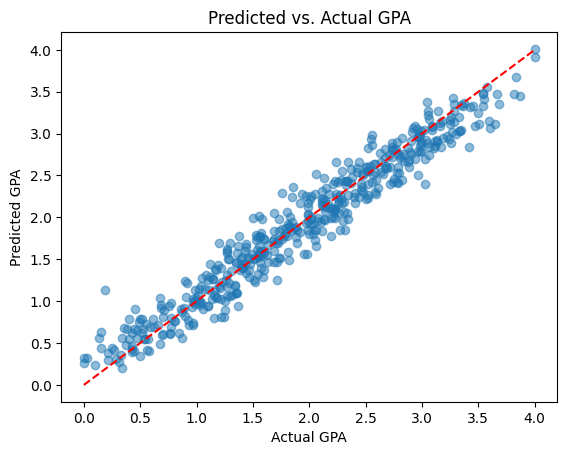

In [32]:
y_pred = model.predict(X_test).flatten()

plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([0, 4], [0, 4], 'r--')  
plt.xlabel("Actual GPA")
plt.ylabel("Predicted GPA")
plt.title("Predicted vs. Actual GPA")
plt.show()


In [33]:
# Calculate metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error


mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')
print(f'Root Mean Squared Error: {rmse}')
print(f'R2: {r2}')

Mean Squared Error: 0.044906017055405395
Mean Absolute Error: 0.16676526551488188
Root Mean Squared Error: 0.2119103986485925
R2: 0.9456956754475049


C:\Users\USER\AppData\Local\Temp\ipykernel_14528\1535758399.py:2: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  residuals = y_test.ravel() - y_pred.ravel()


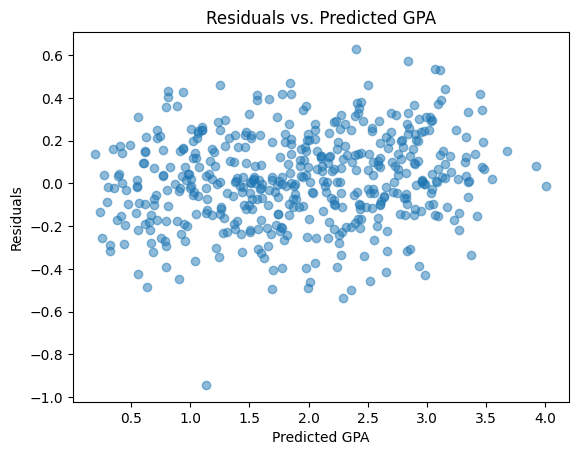

In [34]:
# residual plot
residuals = y_test.ravel() - y_pred.ravel()
plt.scatter(y_pred, residuals, alpha=0.5)
plt.xlabel("Predicted GPA")
plt.ylabel("Residuals")
plt.title("Residuals vs. Predicted GPA")
plt.show()


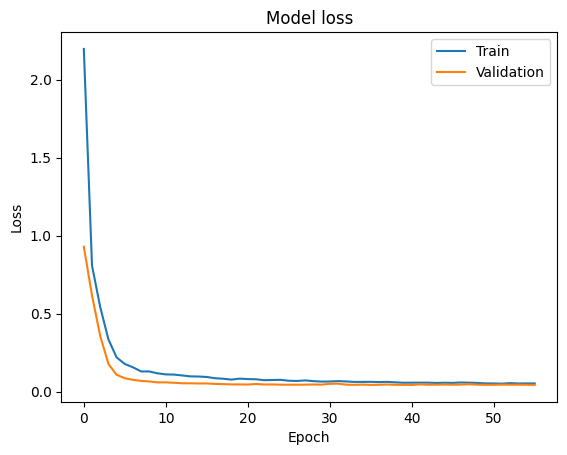

In [35]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

In [36]:
# save model

model.save('../model/student_gpa_model.keras')

In [37]:
import joblib

joblib.dump(scaler, '../model/student_scaler.pkl')
joblib.dump(model, '../model/student_model.pkl')

['../model/student_model.pkl']